In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tqdm.auto import tqdm

from loren_frank_data_processing import (make_epochs_dataframe, make_neuron_dataframe)
from src.parameters import (ANIMALS, MIN_N_NEURONS, _BRAIN_AREAS)
from ZilongCode.utils import get_sweep_and_awake_replay_results

In [3]:
epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)

neuron_info = neuron_info.loc[
(neuron_info.type == 'principal') &
(neuron_info.numspikes > 100) &
neuron_info.area.isin(_BRAIN_AREAS)]


n_neurons = (neuron_info
                .groupby(['animal', 'day', 'epoch'])
                .neuron_id
                .agg(len)
                .rename('n_neurons')
                .to_frame())

epoch_info = epoch_info.join(n_neurons)
is_w_track = (epoch_info.environment
                .isin(['TrackA', 'TrackB', 'WTrackA', 'WTrackB']))

### 1, get correlation between theta sweep length and the awake replay diffusion exponent

In [4]:
animal_names = ['bon', 'fra', 'gov', 'dud', 'con', 'dav', 'Cor', 'egy', 'cha']

all_sweep_len_peranimal = {}; all_sweep_len_perday = {}
all_exponent_peranimal = {}; all_exponent_perday = {}
all_intercept_peranimal = {}; all_intercept_perday = {}
all_ave_speed_peranimal = {}; all_ave_speed_perday = {}
all_ave_activespeed_peranimal = {}; all_ave_activespeed_perday = {}
all_behav_exponent_peranimal = {}; all_behav_exponent_perday = {}
DATA_DIR = '/home/zilong/Desktop/replay_trajectory_paper/Processed-Data'

for name in animal_names:
    
    is_animal = epoch_info.index.isin([name], level='animal')

    valid_epochs = (is_w_track &
                    (epoch_info.n_neurons > MIN_N_NEURONS) &
                    is_animal
                    )

    # #add remy 37 4 to the valid_epochs since this is the only valid epoch for remy. 
    # #generally data for remy was stored differently from other animals
    # valid_epochs[('remy', 37, 4)] = True
    
    sweep_len = []
    exponent = []
    intercept = []
    ave_speed = []
    ave_activespeed = []
    behav_exponent = []
    for epoch_key in tqdm(epoch_info[valid_epochs].index, desc='epochs'):
        animal, day, epoch = epoch_key
        
        #skip 'egy', 10, 2 since no mental_distance_from_actual_position is saved (double check later)
        if (animal, day, epoch) == ('egy', 10, 2):
            continue

        print(f'Animal: {animal}, Day: {day}, Epoch: {epoch}')
        
        #get the average sweep length and replay exponent
        mean_immobile_speed, mean_active_speed, mean_sweep_dist, behav_exp, replay_exponent, replay_intercept = get_sweep_and_awake_replay_results(epoch_key, DATA_DIR, sweep_speed_threshold=4)
        
        #print the average sweep length and replay exponent in one line, keep three decimal places
        print(f'Average sweep length: {mean_sweep_dist:.3f}, Diffusion exponent: {replay_exponent:.3f}')
        
        #attach (without overwriting) mean_immobile_speed, mean_sweep_dist, replay_exponent to 
        #all_sweep_len_perday, all_exponent_perday, all_ave_speed_perday with the key of (animal, day)
        all_sweep_len_perday.setdefault((animal, day), []).append(mean_sweep_dist)
        all_exponent_perday.setdefault((animal, day), []).append(replay_exponent)
        all_intercept_perday.setdefault((animal, day), []).append(replay_intercept)
        all_ave_speed_perday.setdefault((animal, day), []).append(mean_immobile_speed)
        all_ave_activespeed_perday.setdefault((animal, day), []).append(mean_active_speed)
        all_behav_exponent_perday.setdefault((animal, day), []).append(behav_exp)
        
        ave_speed.append(mean_immobile_speed)
        ave_activespeed.append(mean_active_speed)
        behav_exponent.append(behav_exp)
        sweep_len.append(mean_sweep_dist)
        exponent.append(replay_exponent)
        intercept.append(replay_intercept)
        
    all_ave_speed_peranimal[name] = ave_speed   
    all_ave_activespeed_peranimal[name] = ave_activespeed
    all_behav_exponent_peranimal[name] = behav_exponent
    all_sweep_len_peranimal[name] = sweep_len
    all_exponent_peranimal[name] = exponent
    all_intercept_peranimal[name] = intercept


epochs:   0%|          | 0/24 [00:00<?, ?it/s]

Animal: bon, Day: 3, Epoch: 2
1.0000802839894216


Average sweep length: 1.000, Diffusion exponent: 0.836
Animal: bon, Day: 3, Epoch: 4
1.0001349561332682
Average sweep length: 1.000, Diffusion exponent: 0.840
Animal: bon, Day: 3, Epoch: 6
1.000338373669285
Average sweep length: 1.000, Diffusion exponent: 0.476
Animal: bon, Day: 4, Epoch: 2
1.0000917310883337
Average sweep length: 1.000, Diffusion exponent: 0.838
Animal: bon, Day: 4, Epoch: 4
1.000157563232826
Average sweep length: 1.000, Diffusion exponent: 0.759
Animal: bon, Day: 4, Epoch: 6
1.0001642673436097
Average sweep length: 1.000, Diffusion exponent: 0.643
Animal: bon, Day: 5, Epoch: 2
1.0002419392652713
Average sweep length: 1.000, Diffusion exponent: 0.751
Animal: bon, Day: 5, Epoch: 4
1.000160760019815
Average sweep length: 1.000, Diffusion exponent: 0.756
Animal: bon, Day: 5, Epoch: 6
1.0001569865326276
Average sweep length: 1.000, Diffusion exponent: 0.616
Animal: bon, Day: 6, Epoch: 2
1.000176557005581
Average sweep length: 1.000, Diffusion exponent: 0.748
Animal: bon, 

epochs:   0%|          | 0/27 [00:00<?, ?it/s]

Animal: fra, Day: 4, Epoch: 2
0.9999311394740307
Average sweep length: 1.000, Diffusion exponent: 0.813
Animal: fra, Day: 4, Epoch: 4
0.9998068312395476
Average sweep length: 1.000, Diffusion exponent: 0.755
Animal: fra, Day: 4, Epoch: 6
1.0002563190073965
Average sweep length: 1.000, Diffusion exponent: 0.570
Animal: fra, Day: 5, Epoch: 2
1.0000129318716564
Average sweep length: 1.000, Diffusion exponent: 0.723
Animal: fra, Day: 5, Epoch: 4
1.0004313657554391
Average sweep length: 1.000, Diffusion exponent: 0.748
Animal: fra, Day: 5, Epoch: 6
1.0003105624185233
Average sweep length: 1.000, Diffusion exponent: 0.652
Animal: fra, Day: 6, Epoch: 2
1.000203388310817
Average sweep length: 1.000, Diffusion exponent: 0.775
Animal: fra, Day: 6, Epoch: 4
1.0000983711800195
Average sweep length: 1.000, Diffusion exponent: 0.802
Animal: fra, Day: 6, Epoch: 6
1.0000516360395928
Average sweep length: 1.000, Diffusion exponent: 0.559
Animal: fra, Day: 7, Epoch: 2
1.0000069672981853
Average sweep le

epochs:   0%|          | 0/24 [00:00<?, ?it/s]

Animal: gov, Day: 6, Epoch: 2
1.000233991152266
Average sweep length: 1.000, Diffusion exponent: 0.770
Animal: gov, Day: 6, Epoch: 4
0.9997364947458078
Average sweep length: 1.000, Diffusion exponent: 0.834
Animal: gov, Day: 6, Epoch: 6
1.000206652478398
Average sweep length: 1.000, Diffusion exponent: 0.765
Animal: gov, Day: 7, Epoch: 2
1.0003098008467082
Average sweep length: 1.000, Diffusion exponent: 0.792
Animal: gov, Day: 7, Epoch: 4
1.0002631806080118
Average sweep length: 1.000, Diffusion exponent: 0.771
Animal: gov, Day: 7, Epoch: 6
0.9994801960949911
Average sweep length: 0.999, Diffusion exponent: 0.857
Animal: gov, Day: 8, Epoch: 2
1.0002528663200845
Average sweep length: 1.000, Diffusion exponent: 0.782
Animal: gov, Day: 8, Epoch: 4
1.000355294937035
Average sweep length: 1.000, Diffusion exponent: 0.810
Animal: gov, Day: 8, Epoch: 6
0.9996722511729023
Average sweep length: 1.000, Diffusion exponent: 0.662
Animal: gov, Day: 9, Epoch: 2
1.0003776798740236
Average sweep leng

epochs:   0%|          | 0/2 [00:00<?, ?it/s]

Animal: dud, Day: 2, Epoch: 2
1.0002425495528973
Average sweep length: 1.000, Diffusion exponent: 0.792
Animal: dud, Day: 5, Epoch: 2
1.000150720372859
Average sweep length: 1.000, Diffusion exponent: 0.810


epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Animal: con, Day: 1, Epoch: 2
0.9993116487176785
Average sweep length: 0.999, Diffusion exponent: 0.803
Animal: con, Day: 1, Epoch: 4
0.9995125459195318
Average sweep length: 1.000, Diffusion exponent: 0.903
Animal: con, Day: 2, Epoch: 2
0.9996282034690536
Average sweep length: 1.000, Diffusion exponent: 1.084
Animal: con, Day: 2, Epoch: 4
0.9992540724539998
Average sweep length: 0.999, Diffusion exponent: 0.931
Animal: con, Day: 3, Epoch: 2
1.0000433021347994
Average sweep length: 1.000, Diffusion exponent: 0.955
Animal: con, Day: 3, Epoch: 4
0.9988323170543092
Average sweep length: 0.999, Diffusion exponent: 0.953
Animal: con, Day: 4, Epoch: 2
0.9997815305219249
Average sweep length: 1.000, Diffusion exponent: 0.629
Animal: con, Day: 4, Epoch: 4
0.999831708472112
Average sweep length: 1.000, Diffusion exponent: 0.902
Animal: con, Day: 4, Epoch: 6
1.0003815909798035
Average sweep length: 1.000, Diffusion exponent: 0.602
Animal: con, Day: 5, Epoch: 2
1.0004632059832799
Average sweep le

epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Animal: dav, Day: 3, Epoch: 2
1.000057040766566
Average sweep length: 1.000, Diffusion exponent: 0.864
Animal: dav, Day: 3, Epoch: 4
1.000108210186348
Average sweep length: 1.000, Diffusion exponent: 0.761
Animal: dav, Day: 3, Epoch: 6
0.9993264484095223
Average sweep length: 0.999, Diffusion exponent: 0.865
Animal: dav, Day: 4, Epoch: 2
1.0002971928021598
Average sweep length: 1.000, Diffusion exponent: 0.811
Animal: dav, Day: 4, Epoch: 4
0.9999996563510031
Average sweep length: 1.000, Diffusion exponent: 0.860
Animal: dav, Day: 4, Epoch: 6
0.9994088394177842
Average sweep length: 0.999, Diffusion exponent: 0.812
Animal: dav, Day: 5, Epoch: 3
1.0003447354736823
Average sweep length: 1.000, Diffusion exponent: 0.823
Animal: dav, Day: 6, Epoch: 2
1.0000873601256588
Average sweep length: 1.000, Diffusion exponent: 0.781
Animal: dav, Day: 6, Epoch: 4
0.9990722138477222
Average sweep length: 0.999, Diffusion exponent: 0.911
Animal: dav, Day: 6, Epoch: 6
0.9986994571545269
Average sweep len

epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Animal: Cor, Day: 1, Epoch: 2
1.001146241605508
Average sweep length: 1.001, Diffusion exponent: 0.781
Animal: Cor, Day: 1, Epoch: 4
1.0002770725372958
Average sweep length: 1.000, Diffusion exponent: 0.863
Animal: Cor, Day: 2, Epoch: 2
1.000271106996713
Average sweep length: 1.000, Diffusion exponent: 0.774
Animal: Cor, Day: 2, Epoch: 4
1.0000611202027099
Average sweep length: 1.000, Diffusion exponent: 0.703
Animal: Cor, Day: 3, Epoch: 2
1.000384200048713
Average sweep length: 1.000, Diffusion exponent: 0.745
Animal: Cor, Day: 3, Epoch: 4
1.0004546396776586
Average sweep length: 1.000, Diffusion exponent: 0.816
Animal: Cor, Day: 4, Epoch: 2
1.000217839479788
Average sweep length: 1.000, Diffusion exponent: 0.798
Animal: Cor, Day: 4, Epoch: 4
1.0004691232762541
Average sweep length: 1.000, Diffusion exponent: 0.780
Animal: Cor, Day: 7, Epoch: 2
0.9992941114759422
Average sweep length: 0.999, Diffusion exponent: 0.807
Animal: Cor, Day: 8, Epoch: 2
1.0000902451836016
Average sweep lengt

epochs:   0%|          | 0/19 [00:00<?, ?it/s]

Animal: egy, Day: 5, Epoch: 2
1.0002160936076074
Average sweep length: 1.000, Diffusion exponent: 0.800
Animal: egy, Day: 5, Epoch: 4
1.0003352190598953
Average sweep length: 1.000, Diffusion exponent: 0.868
Animal: egy, Day: 5, Epoch: 6
1.0005232066899201
Average sweep length: 1.001, Diffusion exponent: 0.730
Animal: egy, Day: 6, Epoch: 4
1.0002463571860392
Average sweep length: 1.000, Diffusion exponent: 0.856
Animal: egy, Day: 6, Epoch: 7
1.0001139196254734
Average sweep length: 1.000, Diffusion exponent: 0.805
Animal: egy, Day: 7, Epoch: 2
1.0004138277313805
Average sweep length: 1.000, Diffusion exponent: 0.810
Animal: egy, Day: 7, Epoch: 4
1.0000563713733566
Average sweep length: 1.000, Diffusion exponent: 0.826
Animal: egy, Day: 7, Epoch: 6
1.0002272199905862
Average sweep length: 1.000, Diffusion exponent: 0.805
Animal: egy, Day: 8, Epoch: 2
0.9998339215906074
Average sweep length: 1.000, Diffusion exponent: 0.848
Animal: egy, Day: 8, Epoch: 4
0.9998422434883096
Average sweep l

epochs:   0%|          | 0/4 [00:00<?, ?it/s]

Animal: cha, Day: 4, Epoch: 2
0.9993073787174009
Average sweep length: 0.999, Diffusion exponent: 0.727
Animal: cha, Day: 4, Epoch: 4
1.0004498819217016
Average sweep length: 1.000, Diffusion exponent: 0.583
Animal: cha, Day: 8, Epoch: 2
1.0002282287091335
Average sweep length: 1.000, Diffusion exponent: 0.572
Animal: cha, Day: 8, Epoch: 4
1.0002160283264092
Average sweep length: 1.000, Diffusion exponent: 0.668


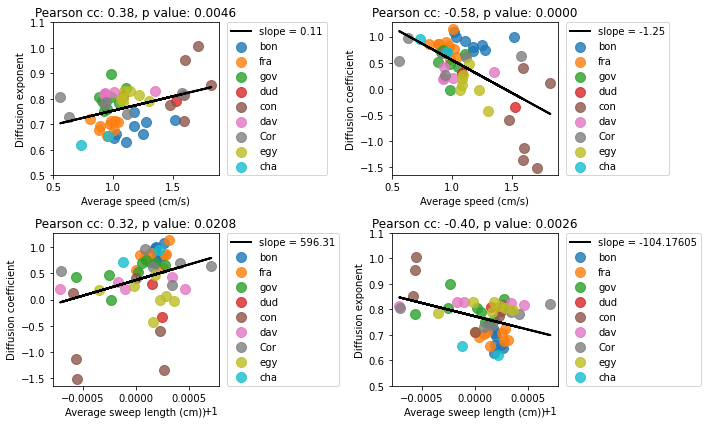

In [5]:
#first avearge all the values under each key in all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday...
all_ave_speed_perday_ave = {}
all_ave_activespeed_perday_ave = {}
all_behav_exponent_perday_ave = {}
all_sweep_len_perday_ave = {}
all_exponent_perday_ave = {}
all_intercept_perday_ave = {}
for key in all_ave_speed_perday.keys():
    all_ave_speed_perday_ave[key] = np.mean(all_ave_speed_perday[key])
    all_ave_activespeed_perday_ave[key] = np.mean(all_ave_activespeed_perday[key])
    all_behav_exponent_perday_ave[key] = np.mean(all_behav_exponent_perday[key])
    all_sweep_len_perday_ave[key] = np.mean(all_sweep_len_perday[key])
    all_exponent_perday_ave[key] = np.mean(all_exponent_perday[key])
    all_intercept_perday_ave[key] = np.mean(all_intercept_perday[key])
    
#group all the keys in all_ave_speed_perday, all_sweep_len_perday, all_exponent_perday by animal name
all_ave_speed_perday_concat = {}
all_ave_activespeed_perday_concat = {}
all_behav_exponent_perday_concat = {}
all_sweep_len_perday_concat = {}
all_exponent_perday_concat = {}
all_intercept_perday_concat = {}
for key in all_ave_speed_perday.keys():
    all_ave_speed_perday_concat.setdefault(key[0], []).append(all_ave_speed_perday_ave[key])
    all_ave_activespeed_perday_concat.setdefault(key[0], []).append(all_ave_activespeed_perday_ave[key])
    all_behav_exponent_perday_concat.setdefault(key[0], []).append(all_behav_exponent_perday_ave[key])
    all_sweep_len_perday_concat.setdefault(key[0], []).append(all_sweep_len_perday_ave[key])
    all_exponent_perday_concat.setdefault(key[0], []).append(all_exponent_perday_ave[key])
    all_intercept_perday_concat.setdefault(key[0], []).append(all_intercept_perday_ave[key])
   
#select colors equals to number of animals from a colormap
#put them in a dictionary with animal names as keys
colors = plt.cm.get_cmap('tab10', len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)
 
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
#plot all_exponent_perday_concat against all_ave_speed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_speed_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_speed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, exp_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)

#pearson test
corr, p = pearsonr(speed_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average speed (cm/s)')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

#intercept
plt.subplot(2,2,2)
#plot all_intercept_perday_concat against all_ave_speed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_speed_perday_concat[name]), 
                np.array(all_intercept_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_speed_perday_concat and all_intercept_perday_concat to numpy array
intercept_np = np.concatenate(list(all_intercept_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_speed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, intercept_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)

#pearson test
corr, p = pearsonr(speed_np, intercept_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average speed (cm/s)')
plt.ylabel('Diffusion coefficient')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2,2,3)
#plot all_intercept_perday_concat against all_sweep_len_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat[name]), 
                np.array(all_intercept_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat and all_intercept_perday_concat to numpy array
intercept_np = np.concatenate(list(all_intercept_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
slope, intercept = np.polyfit(sweep_len_np, intercept_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, intercept_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion coefficient')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2,2,4)
#plot all_exponent_perday_concat against all_sweep_len_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])   
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

# store animal_names, all_sweep_len_perday_concat, all_exponent_perday_concat together in one pkl file 
# using pickle for producing paper figure in another script
import pickle
with open('./sweep_replay_correlation_realdata.pkl', 'wb') as f:
    pickle.dump([animal_names, all_sweep_len_perday_concat, all_exponent_perday_concat], f)


plt.tight_layout()
plt.show()


#### check the correlation with active speed

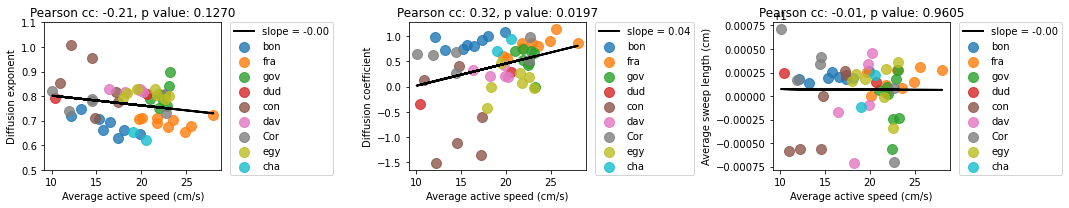

In [10]:
#plot the exponent against average active speed, and intercept against average active speed
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
#plot all_exponent_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_activespeed_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_activespeed_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, exp_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(speed_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average active speed (cm/s)')
plt.ylabel('Diffusion exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

#intercept
plt.subplot(1,3,2)
#plot all_intercept_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_activespeed_perday_concat[name]), 
                np.array(all_intercept_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_activespeed_perday_concat and all_intercept_perday_concat to numpy array
intercept_np = np.concatenate(list(all_intercept_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, intercept_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(speed_np, intercept_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average active speed (cm/s)')
plt.ylabel('Diffusion coefficient')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#plot sweep length against average active speed
plt.subplot(1,3,3)
#plot all_sweep_len_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_activespeed_perday_concat[name]), 
                np.array(all_sweep_len_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_activespeed_perday_concat and all_sweep_len_perday_concat to numpy array
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, sweep_len_np, 1)
plt.plot(speed_np, speed_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(speed_np, sweep_len_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average active speed (cm/s)')
plt.ylabel('Average sweep length (cm)')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    

plt.tight_layout()
plt.show()


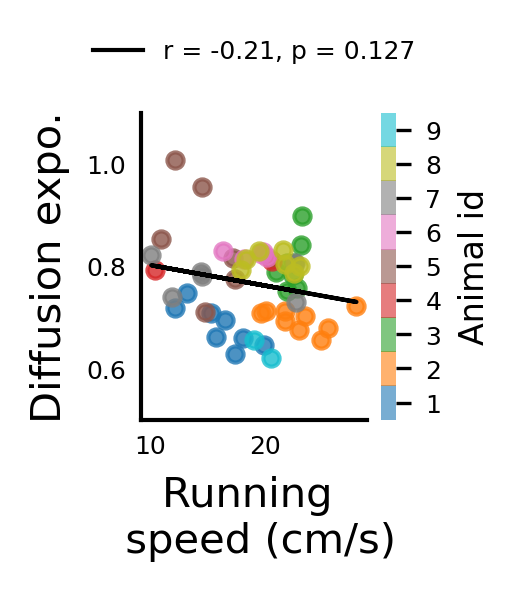

In [18]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap

#plot the exponent against average active speed, and intercept against average active speed
plt.figure(figsize=(1.8,2.2), dpi=300)
plt.subplot(1,1,1)
#top and right spine off
ax = plt.gca()
labelsize=8
ticksize=6

colors = plt.cm.get_cmap('tab10', len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

#plot all_exponent_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_ave_activespeed_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                s=15, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_ave_activespeed_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, exp_np, 1)

#pearson test
corr, p = pearsonr(speed_np, exp_np)
ax.plot(speed_np, speed_np * slope + intercept, "k-", label="r = %.2f, p = %.3f" % (corr, p), linewidth=1)
#pearson test
ax.set_xlabel('Running \n speed (cm/s)')
ax.set_ylabel('Diffusion expo.')
#put the legend outside the plot on the right side
ax.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.2))
ax.set_yticks([0.6, 0.8, 1.0])
ax.set_ylim([0.5, 1.0])

#add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=labelsize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
#cbar tick size
cbar.ax.tick_params(labelsize=6)

ax.tick_params(labelsize=ticksize)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# axis line width 1.0
ax.spines["bottom"].set_linewidth(1.0)
ax.spines["left"].set_linewidth(1.0)
# remove the tick bars on the left and bottom
ax.tick_params(axis="both", which="both", length=0)

ax.set_ylim([0.5, 1.1])

plt.tight_layout()
plt.savefig('/home/zilong/Desktop/replay_trajectory_paper/Processed-Data/Paper_figures/FigSI_replayexpoactivespeed.pdf', bbox_inches='tight')


#### check the corelation with behaviroal trajectory exponent

In [ ]:
#plot the exponent against behavioral exponent, and intercept against behavioral exponent
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
#plot all_exponent_perday_concat against all_behav_exponent_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_behav_exponent_perday_concat[name]), 
                np.array(all_exponent_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_behav_exponent_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
behav_exp_np = np.concatenate(list(all_behav_exponent_perday_concat.values()))

slope, intercept = np.polyfit(behav_exp_np, exp_np, 1)
plt.plot(behav_exp_np, behav_exp_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(behav_exp_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Behavioral exponent')
plt.ylabel('Replay exponent')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim([0.5, 1.1])

#plot sweep length against average active speed
plt.subplot(1,2,2)
#plot all_sweep_len_perday_concat against all_behav_exponent_perday_concat
for name in animal_names:
    plt.scatter(np.array(all_behav_exponent_perday_concat[name]), 
                np.array(all_sweep_len_perday_concat[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_behav_exponent_perday_concat and all_sweep_len_perday_concat to numpy array
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
behav_exp_np = np.concatenate(list(all_behav_exponent_perday_concat.values()))
slope, intercept = np.polyfit(behav_exp_np, sweep_len_np, 1)
plt.plot(behav_exp_np, behav_exp_np*slope+intercept, 'k-', label='slope = %.2f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(behav_exp_np, sweep_len_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Behavioral exponent')
plt.ylabel('Average sweep length (cm)')
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


### 2, shuffle the epoch key of replay (control study, in-animal shuffle)

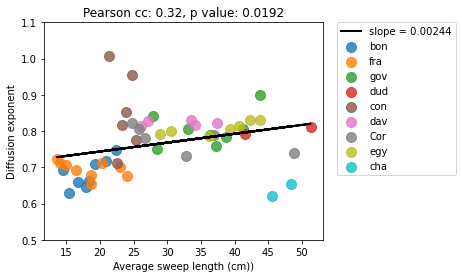

In [60]:
#for each key in all_exponent_perday_concat, shuffle the values in the list
#store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled = {}
for key in all_exponent_perday_concat.keys():
    all_exponent_perday_concat_shuffled[key] = np.random.permutation(all_exponent_perday_concat[key])
    
#copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled = all_sweep_len_perday_concat.copy()

#plot all_exponent_perday_concat_shuffled against all_sweep_len_perday_concat_shuffled
plt.figure(figsize=(5,4))
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat_shuffled[name]), 
                np.array(all_exponent_perday_concat_shuffled[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat_shuffled and all_exponent_perday_concat_shuffled to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
plt.ylim([0.5, 1.1])
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    

### 3, cross-animal shuffle

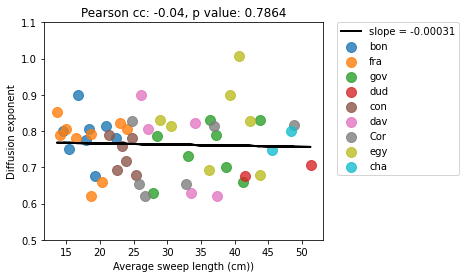

In [61]:
#for each key in all_exponent_perday_concat, shuffle the values in the list by replacing each of them with a 
#random value sampled from other keys, and store the shuffled values in a new dictionary
all_exponent_perday_concat_shuffled_crossanimal = {}
for key in all_exponent_perday_concat.keys():
    #first get all the values except the values under the current key
    all_values = []
    for key2 in all_exponent_perday_concat.keys():
        if key2 != key:
            all_values.extend(all_exponent_perday_concat[key2])
    #then shuffle the values under the current key by sampling the same number of values from all_values
    all_exponent_perday_concat_shuffled_crossanimal[key] = np.random.choice(all_values, len(all_exponent_perday_concat[key]), replace=False)
#copy all_sweep_len_perday_concat to a new dictionary
all_sweep_len_perday_concat_shuffled_crossanimal = all_sweep_len_perday_concat.copy()

#plot all_exponent_perday_concat_shuffled_crossanimal against all_sweep_len_perday_concat_shuffled_crossanimal
plt.figure(figsize=(5,4))
for name in animal_names:
    plt.scatter(np.array(all_sweep_len_perday_concat_shuffled_crossanimal[name]), 
                np.array(all_exponent_perday_concat_shuffled_crossanimal[name]), 
                label=name, s=100, alpha=0.8, color=color_dict[name])
#add linear fit line to the plot using numpy.polyfit
#convert all_sweep_len_perday_concat_shuffled_crossanimal and all_exponent_perday_concat_shuffled_crossanimal to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat_shuffled_crossanimal.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat_shuffled_crossanimal.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)
plt.plot(sweep_len_np, sweep_len_np*slope+intercept, 'k-', label='slope = %.5f'%slope, linewidth=2)
#pearson test
corr, p = pearsonr(sweep_len_np, exp_np)
plt.title('Pearson cc: %.2f, p value: %.4f'%(corr, p))
plt.xlabel('Average sweep length (cm))')
plt.ylabel('Diffusion exponent')
plt.ylim([0.5, 1.1])
#put the legend outside the plot on the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
